<a href="https://colab.research.google.com/github/KwonHo-geun/automobile/blob/main/25.07.15_CNN_%EC%98%88%EC%8B%9C_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 🔧 필요한 라이브러리 설치
!pip install tensorflow matplotlib pillow numpy

# 📦 라이브러리 임포트
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

CNN 모델

In [3]:
# 🧠 간단한 CNN 모델 생성
def create_simple_cnn():
    """
    교육용 간단한 CNN 모델 생성
    """
    model = tf.keras.Sequential([
        # 첫 번째 컨볼루션 레이어
        #커널, (필터 크기), 활성화 함수, 입력 이미지 크기
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        #(영역 다운 샘플링)
        tf.keras.layers.MaxPooling2D(2, 2),

        # 두 번째 컨볼루션 레이어
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # 세 번째 컨볼루션 레이어
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Flatten & Dense 레이어
        #다차원 배열 이미지 맵을 1차원 벡터로 변환
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        #비활성화(0.5)
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 classes: Animal/Car/Other
    ])

    # 모델 컴파일
    model.compile(
        optimizer='adam',
        #
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("🧠 CNN 모델 생성 완료!")
    return model


In [4]:
# 📊 CNN 구조 시각화
def visualize_model_architecture(model):
    """
    CNN 모델 구조를 시각적으로 보여주기
    """
    print("\n📋 CNN 모델 구조:")
    print("=" * 50)
    model.summary()

    # 레이어별 설명
    print("\n🔍 레이어별 역할:")
    print("📌 Conv2D: 특징 추출 (엣지, 패턴 등)")
    print("📌 MaxPooling2D: 크기 축소 + 중요 특징 선택")
    print("📌 Flatten: 2D → 1D 변환")
    print("📌 Dense: 최종 분류 결정")
    print("📌 Dropout: 과적합 방지")

In [5]:
# 🎲 가짜 데이터로 빠른 훈련
def quick_train_with_dummy_data(model):
    """
    데모용 가짜 데이터로 빠른 훈련
    """
    print("\n🎓 데모용 빠른 훈련 시작...")

    # 가짜 훈련 데이터 생성 (200개 샘플)
    #갯수, 이미지의 크기(64) 채널(3)
    X_train = np.random.rand(200, 64, 64, 3).astype('float32')
    #200개 갬플, 3개 클래스 중 하나에 속함
    y_train = tf.keras.utils.to_categorical(np.random.randint(0, 3, 200), 3)

    # 빠른 훈련 (3 epochs만)
    history = model.fit(
        X_train, y_train,
        epochs=3,
        batch_size=32,
        verbose=1
    )

    print("✅ 훈련 완료! (실제 프로젝트에서는 실제 데이터 사용)")
    return history

In [6]:
# 🔍 CNN 필터 시각화
def visualize_cnn_filters(model):
    """
    CNN 첫 번째 레이어의 학습된 필터들 시각화
    """
    try:
        # 모델이 빌드되었는지 확인
        if not hasattr(model, 'built') or not model.built:
            print("⚠️ 모델을 빌드하는 중...")
            #0과 1 사이의 랜덤 실수로 배열 생성
            dummy_input = np.random.rand(1, 64, 64, 3)
            _ = model(dummy_input)

        # 첫 번째 Conv2D 레이어 찾기
        first_conv_layer = None
        for layer in model.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                first_conv_layer = layer
                break

        if first_conv_layer is None:
            print("❌ Conv2D 레이어를 찾을 수 없습니다.")
            return

        # 첫 번째 Conv2D 레이어의 가중치 추출
        weights = first_conv_layer.get_weights()
        if len(weights) == 0:
            print("⚠️ 아직 가중치가 초기화되지 않았습니다.")
            return

        filters = weights[0]  # 필터 가중치

        print(f"\n🔍 첫 번째 레이어 필터 시각화")
        print(f"필터 개수: {filters.shape[3]}개")
        #필터의 공간 크기
        print(f"필터 크기: {filters.shape[0]}x{filters.shape[1]}")

        # 필터 중 처음 8개만 시각화
        num_filters_to_show = min(8, filters.shape[3])
        fig, axes = plt.subplots(2, 4, figsize=(12, 6))
        fig.suptitle('CNN Learned Filters (First Layer)', fontsize=16)

        for i in range(num_filters_to_show):
            ax = axes[i // 4, i % 4]

            # 필터를 시각화하기 위해 정규화
            filter_img = filters[:, :, 0, i]  # 첫 번째 채널의 i번째 필터

            # 정규화 (0-1 범위로)
            if filter_img.max() > filter_img.min():
                filter_img = (filter_img - filter_img.min()) / (filter_img.max() - filter_img.min())

            ax.imshow(filter_img, cmap='viridis')
            ax.set_title(f'Filter {i+1}')
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ 필터 시각화 중 오류 발생: {str(e)}")
        print("💡 이는 모델 구조나 가중치 이슈일 수 있습니다.")
        print("📝 주요 기능(예측)은 정상 작동합니다!")


In [7]:
# 📸 이미지 업로드 및 전처리
def upload_and_preprocess_image():
    """
    이미지 업로드 및 CNN 입력용 전처리
    """
    print("📸 이미지를 업로드해주세요!")
    uploaded = files.upload()

    filename = list(uploaded.keys())[0]
    image_data = uploaded[filename]

    # 이미지 로드 및 전처리
    image = Image.open(io.BytesIO(image_data))

    # RGB로 변환 (RGBA인 경우)
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # 크기 조정 (64x64)
    image_resized = image.resize((64, 64))

    # 배열로 변환 및 정규화
    image_array = np.array(image_resized).astype('float32') / 255.0

    # 배치 차원 추가 (1, 64, 64, 3)
    image_batch = np.expand_dims(image_array, axis=0)

    return image, image_resized, image_batch, filename

In [8]:
# 🎯 CNN 예측 및 결과 시각화
def predict_and_visualize(model, original_img, processed_img, image_batch, filename):
    """
    CNN으로 예측하고 결과 시각화
    """
    # 클래스 라벨 정의
    class_names = ['Animal', 'Car', 'Other']

    # CNN 예측
    predictions = model.predict(image_batch, verbose=0)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]

    # 결과 시각화
    plt.figure(figsize=(15, 5))

    # 원본 이미지
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title(f'original image\n({filename})')
    plt.axis('off')

    # 전처리된 이미지 (CNN 입력)
    plt.subplot(1, 3, 2)
    plt.imshow(processed_img)
    plt.title('CNN input image\n(64x64 크기 조정)')
    plt.axis('off')

    # 예측 결과
    plt.subplot(1, 3, 3)
    bars = plt.bar(class_names, predictions[0])
    bars[predicted_class].set_color('red')  # 최고 확률 클래스 강조
    plt.title(f'CNN Prediction Results\nPrediction: {class_names[predicted_class]} ({confidence:.2%})')
    plt.ylabel('Probability')
    plt.ylim(0, 1)

    # 확률 값 표시
    for i, (name, prob) in enumerate(zip(class_names, predictions[0])):
        plt.text(i, prob + 0.02, f'{prob:.2%}', ha='center')

    plt.tight_layout()
    plt.show()

    # 결과 출력
    print("\n🎯 CNN Prediction Results:")
    print("=" * 30)
    for i, (name, prob) in enumerate(zip(class_names, predictions[0])):
        marker = "👉" if i == predicted_class else "  "
        print(f"{marker} {name}: {prob:.2%}")
    print("=" * 30)
    print(f"Final Prediction: {class_names[predicted_class]} (Confidence: {confidence:.2%})")


In [9]:
# 🔬 CNN 중간 레이어 활성화 시각화
def visualize_intermediate_activations(model, image_batch):
    """
    CNN 중간 레이어들의 활성화 맵 시각화
    """
    print("\n🔬 CNN 내부 작동 과정 시각화...")

    try:
        # 모델이 빌드되었는지 확인
        if not hasattr(model, 'built') or not model.built:
            print("⚠️ 모델을 빌드하는 중...")
            # 더미 데이터로 모델 빌드
            dummy_input = np.random.rand(1, 64, 64, 3)
            _ = model(dummy_input)

        # Conv2D 레이어만 찾기
        conv_layers = []
        layer_names = []

        for i, layer in enumerate(model.layers):
            if isinstance(layer, tf.keras.layers.Conv2D):
                conv_layers.append(layer)
                layer_names.append(f'Conv2D Layer {len(conv_layers)}')

        if len(conv_layers) == 0:
            print("❌ Conv2D 레이어를 찾을 수 없습니다.")
            return

        # 중간 레이어 출력을 위한 모델 생성
        layer_outputs = [layer.output for layer in conv_layers]
        activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

        # 활성화 맵 계산
        activations = activation_model.predict(image_batch, verbose=0)

        # 단일 출력인 경우 리스트로 변환
        if not isinstance(activations, list):
            activations = [activations]

        # 시각화
        num_layers = min(3, len(conv_layers))  # 최대 3개 레이어만
        plt.figure(figsize=(15, 10))

        for i in range(num_layers):
            activation = activations[i]
            layer_name = layer_names[i]

            # 처음 4개 필터만 표시
            num_filters = min(4, activation.shape[-1])
            for j in range(num_filters):
                plt.subplot(num_layers, 4, i*4 + j + 1)

                # 활성화 맵 정규화
                feature_map = activation[0, :, :, j]
                if feature_map.max() > feature_map.min():
                    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())

                plt.imshow(feature_map, cmap='viridis')
                plt.title(f'{layer_name}\nFilter {j+1}')
                plt.axis('off')

        plt.suptitle('CNN Feature Maps - How CNN "Sees" Your Image', fontsize=16)
        plt.tight_layout()
        plt.show()

        print("💡 해석:")
        print("- 첫 번째 레이어: 기본적인 엣지, 색상 검출")
        print("- 두 번째 레이어: 더 복잡한 패턴 조합")
        print("- 세 번째 레이어: 고수준 특징 (객체 부분)")

    except Exception as e:
        print(f"⚠️ 활성화 시각화 중 오류 발생: {str(e)}")
        print("💡 이는 모델 구조나 TensorFlow 버전 이슈일 수 있습니다.")
        print("📝 주요 기능(예측)은 정상 작동합니다!")


In [10]:
# 🎮 메인 실행 함수
def run_cnn_demo():
    """
    CNN 교육용 데모 메인 실행
    """
    print("🎉 진짜 CNN 교육용 데모 시작!")
    print("=" * 50)

    # 1. CNN 모델 생성
    model = create_simple_cnn()

    # 2. 모델 구조 확인
    visualize_model_architecture(model)

    # 3. 빠른 훈련 (데모용)
    history = quick_train_with_dummy_data(model)

    # 4. 학습된 필터 시각화
    visualize_cnn_filters(model)

    # 5. 이미지 업로드 및 예측
    original_img, processed_img, image_batch, filename = upload_and_preprocess_image()

    # 6. CNN 예측 및 결과 시각화
    predict_and_visualize(model, original_img, processed_img, image_batch, filename)

    # 7. CNN 내부 작동 과정 시각화
    visualize_intermediate_activations(model, image_batch)

    print("\n🎓 CNN 데모 완료!")
    print("💡 이제 CNN이 어떻게 이미지를 '이해'하는지 보셨습니다!")

📚 CNN 교육용 데모 - 실제 신경망으로 이미지 분류 체험
🔥 이번에는 진짜 CNN입니다!

🎉 진짜 CNN 교육용 데모 시작!
🧠 CNN 모델 생성 완료!

📋 CNN 모델 구조:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,011 (1.22 MB)

 Trainable params: 319,011 (1.22 MB)

 Non-trainable params: 0 (0.00 B)


🔍 레이어별 역할:
📌 Conv2D: 특징 추출 (엣지, 패턴 등)
📌 MaxPooling2D: 크기 축소 + 중요 특징 선택
📌 Flatten: 2D → 1D 변환
📌 Dense: 최종 분류 결정
📌 Dropout: 과적합 방지

🎓 데모용 빠른 훈련 시작...
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 269ms/step - accuracy: 0.3976 - loss: 1.1817
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.3652 - loss: 1.1120
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 0.3753 - loss: 1.0864
✅ 훈련 완료! (실제 프로젝트에서는 실제 데이터 사용)

🔍 첫 번째 레이어 필터 시각화
필터 개수: 16개
필터 크기: 3x3


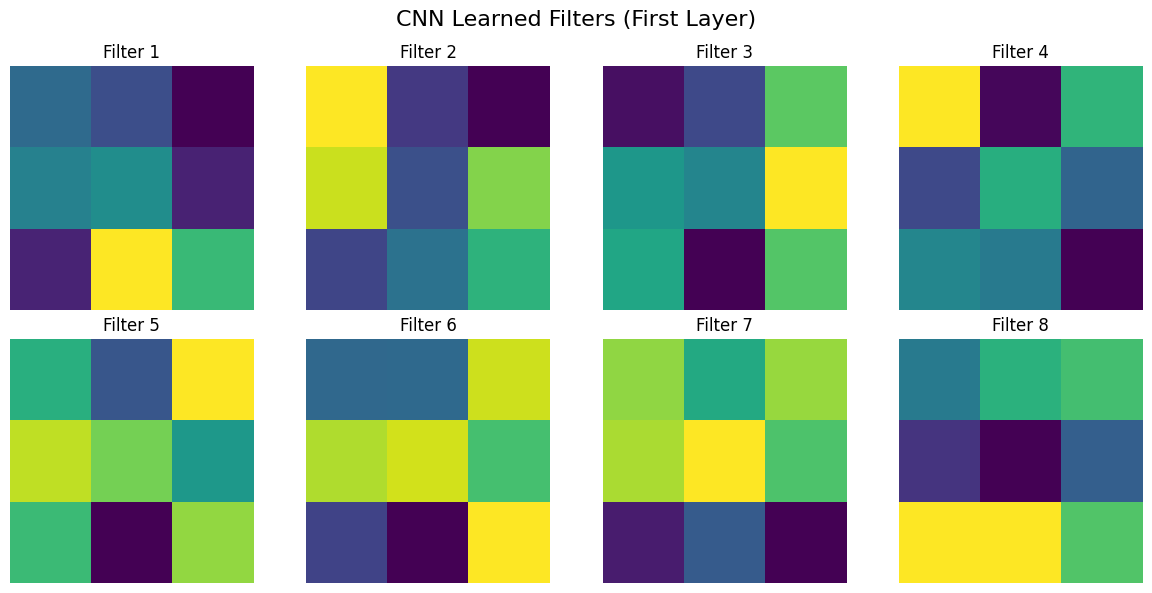

📸 이미지를 업로드해주세요!


Saving urban-20230228144115810458.jpg to urban-20230228144115810458.jpg


/tmp/ipython-input-8-3309983945.py:41: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3309983945.py:41: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3309983945.py:41: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3309983945.py:41: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


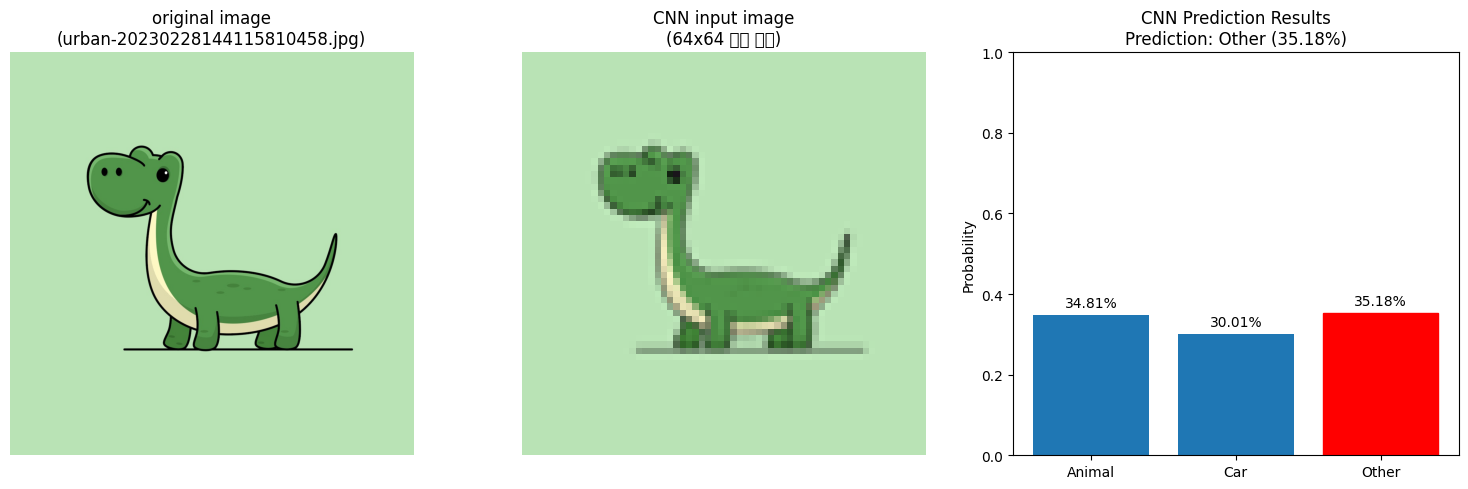


🎯 CNN Prediction Results:
   Animal: 34.81%
   Car: 30.01%
👉 Other: 35.18%
Final Prediction: Other (Confidence: 35.18%)

🔬 CNN 내부 작동 과정 시각화...
⚠️ 활성화 시각화 중 오류 발생: The layer sequential_1 has never been called and thus has no defined input.
💡 이는 모델 구조나 TensorFlow 버전 이슈일 수 있습니다.
📝 주요 기능(예측)은 정상 작동합니다!

🎓 CNN 데모 완료!
💡 이제 CNN이 어떻게 이미지를 '이해'하는지 보셨습니다!


In [11]:
# 🚀 데모 실행
print("📚 CNN 교육용 데모 - 실제 신경망으로 이미지 분류 체험")
print("🔥 이번에는 진짜 CNN입니다!")
print()
run_cnn_demo()